In [1]:
# This notebook contains source codes for, retail weekly sales analysis project. 
# All datasets used during this study will be shared on git-hub profile.
# This is a public domain project. You can use, share every file, code as you please.
# Pandas, matplotlib and seaborn will be imported during this study.
# Null values other than "Markdown" will be removed for better analysis.
# This study only covers analysis for weekly-sales trend and how it changes according to various factors.
# Machine learning with tensorFlow tried beforehand but my current experience is not enough to build the perfect model for this data.
# If you want to study further and if you encounter any bugs, errors, mismanipulated data, please contact me share your experience.
# I would be delihted to learn from you.

In [2]:
import pandas as pd

In [3]:
# Read relevant data to work on.

dfStores = pd.read_csv('stores data-set.csv')
df = pd.read_csv('Features data set.csv')
dfSales = pd.read_csv("sales data-set.csv")

# Merged data to work easily and customized it.

merged_df = df.merge(dfStores,on="Store",how="left")
desired_order = ["Store","Type","Size","Date","Temperature","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment","IsHoliday"]
merged_df = merged_df[desired_order]

# Data types formated and sorted data.

merged_df["Date"] = pd.to_datetime(merged_df["Date"], format="%d/%m/%Y")
merged_df = merged_df.sort_values(by=["Store", "Date"], ascending=[True, True])
dfSales["Date"] = pd.to_datetime(dfSales["Date"], format="%d/%m/%Y")
dfSales = dfSales.sort_values(by=["Store","Date",],ascending=[True,True])

# Merged remaining data.

merged_df = merged_df.merge(dfSales, on=["Store", "Date"], how="left")

In [4]:
merged_df.isnull().sum()

Store                0
Type                 0
Size                 0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
IsHoliday_x          0
Dept              1755
Weekly_Sales      1755
IsHoliday_y       1755
dtype: int64

In [5]:
merged_df.dtypes

Store                    int64
Type                    object
Size                     int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday_x               bool
Dept                   float64
Weekly_Sales           float64
IsHoliday_y             object
dtype: object

In [6]:
# Columns are doubled because of the merge func. Dropped repating rows and columns.

merged_df = merged_df.drop(columns=["IsHoliday_y"])

In [7]:
merged_df = merged_df.rename(columns={"IsHoliday_x": "IsHoliday"})

In [8]:
# I choose to work without null data but "Markdown" data is affecting sales and many of them are null so I decide to keep them as they are.

dfClean = merged_df.dropna(subset = ['CPI','Unemployment','IsHoliday','Dept','Weekly_Sales'])

In [9]:
dfClean.isnull().sum()

Store                0
Type                 0
Size                 0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
dtype: int64

In [10]:
# To make it possible to analyze data without dealing with types I also convert "Type" column data to Integer as: 1,2 and 3

dfClean["Type"] = dfClean["Type"].map({"A": 1, "B": 2, "C": 3})

C:\Users\eren_\AppData\Local\Temp\ipykernel_14400\2497286847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean["Type"] = dfClean["Type"].map({"A": 1, "B": 2, "C": 3})


In [11]:
import matplotlib.pyplot as plt
import seaborn as sbn

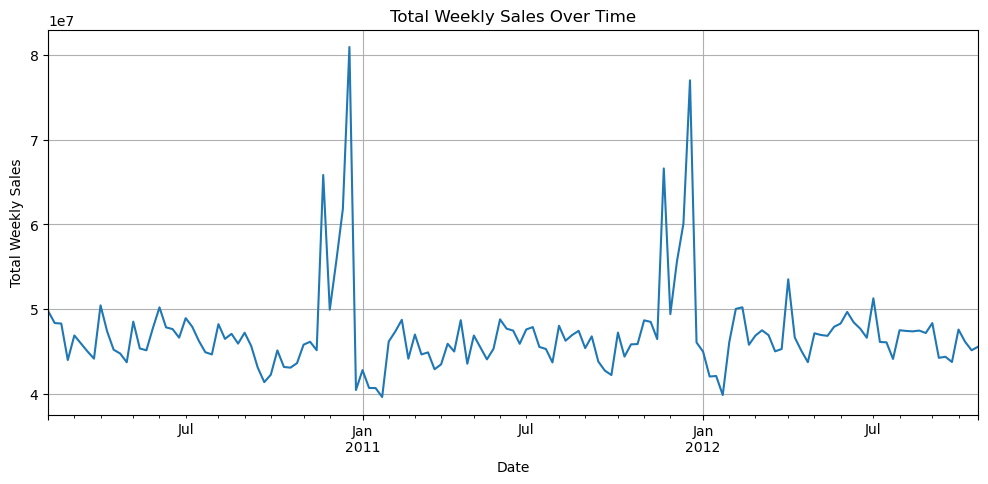

In [12]:
# First analysis is to check "Weekly_Sales" trend over time.

plt.figure(figsize=(12, 5))
df_grouped = dfClean.groupby("Date")["Weekly_Sales"].sum()
df_grouped.plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.grid()
plt.show()

In [13]:
# Being sure that "Date" order is correct.

dfClean.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1.0,24924.50
1,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2.0,50605.27
2,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3.0,13740.12
3,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4.0,39954.04
4,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5.0,32229.38


In [14]:
# Analysis indicates that many revenue happends right before new year. This can affect our analysis and lead us to wrong outcomes.
# I choose to exclude periods with too high revenues.
# In 2010 and 2011 trends look alike so I decide to remove data within 2010 as well.

excluded_periods = (dfClean["Date"] <= "2011-01-01") | ((dfClean["Date"] >= "2011-10-01") & (dfClean["Date"] <= "2012-01-01"))
dfDateFiltered = dfClean[~excluded_periods]

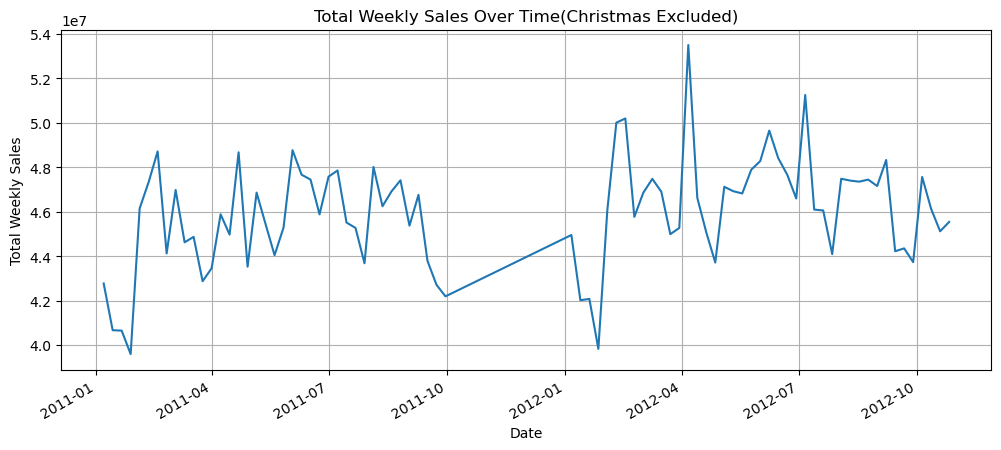

In [15]:
# See sales trends with new timelines.

plt.figure(figsize=(12, 5))
dfFilteredGrouped = dfDateFiltered.groupby("Date")["Weekly_Sales"].sum()
dfFilteredGrouped.plot()
plt.title("Total Weekly Sales Over Time(Christmas Excluded)")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.grid()
plt.show()

In [16]:
# I choose to analyze affect and trends with "Markdowns" over "Weekly_Sales" so I create a new dataFrame to keep my main data safe.

dfMarkdownAnalysis = dfDateFiltered.copy()

In [17]:
# I name data with markdowns as "Positive" and data without markdowns as "Negative".
# You might choose to keep data without markdowns as null as I did. 
# Converting them to 0 might affect analysis as many values of markdown hover around 0. (Especially if you are going to use this data for forcasting)

markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]

dfMarkdownAnalysis["Positive_Markdown"] = dfMarkdownAnalysis[markdown_cols].gt(0).any(axis=1)
dfMarkdownAnalysis["Negative_Markdown"] = dfMarkdownAnalysis[markdown_cols].isnull().any(axis=1)

In [18]:
# With this we can see that positive markdowns usually helps stores to sell with higher price.

salesPositiveMarkdown = dfMarkdownAnalysis[dfMarkdownAnalysis["Positive_Markdown"]]["Weekly_Sales"]
salesNegativeMarkdown = dfMarkdownAnalysis[dfMarkdownAnalysis["Negative_Markdown"]]["Weekly_Sales"]

avgSalesPositive = salesPositiveMarkdown.mean()
avgSalesNegative = salesNegativeMarkdown.mean()

print(f"Average Sales Price with Positive Markdowns: {avgSalesPositive}")
print(f"Average Sales with Negative Markdowns: {avgSalesNegative}")

Average Sales Price with Positive Markdowns: 15694.948597357148
Average Sales with Negative Markdowns: 14791.958523251555


C:\Users\eren_\AppData\Local\Temp\ipykernel_14400\790947914.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(salesPositiveMarkdown, label="Positive Markdowns", shade=True)
C:\Users\eren_\AppData\Local\Temp\ipykernel_14400\790947914.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(salesNegativeMarkdown, label="Negative Markdowns", shade=True)


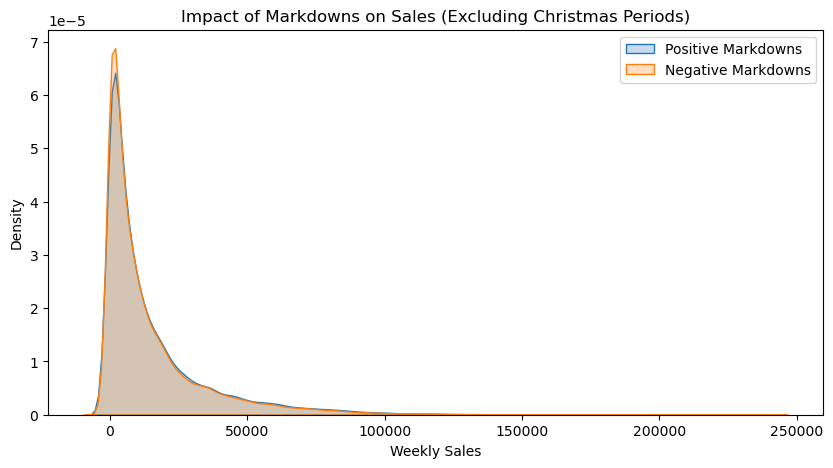

In [19]:
# But we also need to be sure that sale count with markdown is not so different without them.
# Until next comment I try to analyze data to see if I need to oversample positive or NaN markdown data.

plt.figure(figsize=(10, 5))
sbn.kdeplot(salesPositiveMarkdown, label="Positive Markdowns", shade=True)
sbn.kdeplot(salesNegativeMarkdown, label="Negative Markdowns", shade=True)
plt.xlabel("Weekly Sales")
plt.ylabel("Density")
plt.title("Impact of Markdowns on Sales (Excluding Christmas Periods)")
plt.legend()
plt.show()

In [20]:
print(f"Median Sales with Positive Markdowns: {salesPositiveMarkdown.median()}")
print(f"Median Sales with Negative Markdowns: {salesNegativeMarkdown.median()}")


Median Sales with Positive Markdowns: 7365.095
Median Sales with Negative Markdowns: 6886.52


In [21]:
print(f"Count of Sales with Positive Markdowns: {salesPositiveMarkdown.count()}")
print(f"Count of Sales with Negative Markdowns: {salesNegativeMarkdown.count()}")

Count of Sales with Positive Markdowns: 127438
Count of Sales with Negative Markdowns: 163860


In [22]:
# If you check the kaggle page for these datasets, you can see that markdowns are only availabe after november, 2011.
# Because of that sales without markdowns are going to be higher because of the data before this date.
# I split my data again to analyze sales only after stores start to apply markdowns.

dfAfter2012 = dfMarkdownAnalysis["Date"] > "2012-01-01"

In [23]:
dfMarkdownAnalysisOverSample = dfMarkdownAnalysis[dfAfter2012]

In [24]:
markdown_cols_after2012 = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]

dfMarkdownAnalysisOverSample["Positive_Markdown"] = dfMarkdownAnalysisOverSample[markdown_cols_after2012].gt(0).any(axis=1)
dfMarkdownAnalysisOverSample["Negative_Markdown"] = dfMarkdownAnalysisOverSample[markdown_cols_after2012].isnull().any(axis=1)

salesPositiveMarkdownAfter2012 = dfMarkdownAnalysisOverSample[dfMarkdownAnalysisOverSample["Positive_Markdown"]]["Weekly_Sales"]
salesNegativeMarkdownAfter2012 = dfMarkdownAnalysisOverSample[dfMarkdownAnalysisOverSample["Negative_Markdown"]]["Weekly_Sales"]

avgSalesPositiveAfter2012 = salesPositiveMarkdownAfter2012.mean()
avgSalesNegativeAfter2012 = salesNegativeMarkdownAfter2012.mean()

print(f"Average Sales Price with Positive Markdowns After 2012: {avgSalesPositiveAfter2012}")
print(f"Average Sales with Negative Markdowns After 2012: {avgSalesNegativeAfter2012}")

Average Sales Price with Positive Markdowns After 2012: 15694.948597357148
Average Sales with Negative Markdowns After 2012: 13362.72611631927


C:\Users\eren_\AppData\Local\Temp\ipykernel_14400\353242470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMarkdownAnalysisOverSample["Positive_Markdown"] = dfMarkdownAnalysisOverSample[markdown_cols_after2012].gt(0).any(axis=1)
C:\Users\eren_\AppData\Local\Temp\ipykernel_14400\353242470.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMarkdownAnalysisOverSample["Negative_Markdown"] = dfMarkdownAnalysisOverSample[markdown_cols_after2012].isnull().any(axis=1)


C:\Users\eren_\AppData\Local\Temp\ipykernel_14400\2415171469.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(salesPositiveMarkdownAfter2012, label="Positive Markdowns", shade=True)
C:\Users\eren_\AppData\Local\Temp\ipykernel_14400\2415171469.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(salesNegativeMarkdownAfter2012, label="Negative Markdowns", shade=True)


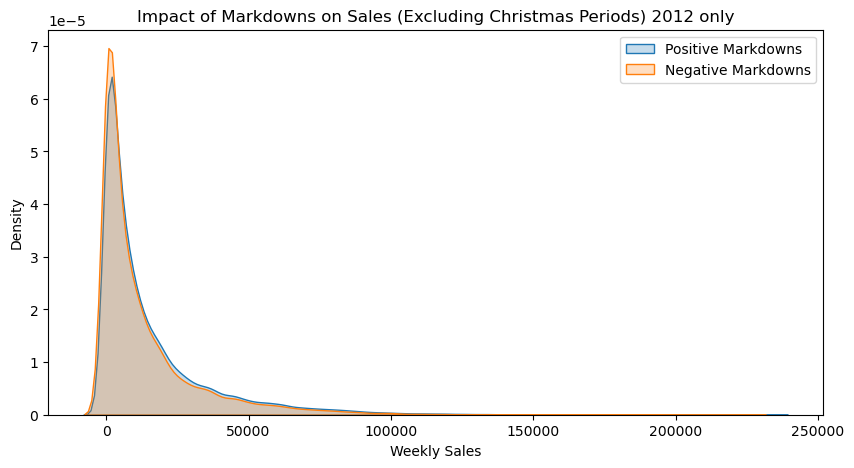

In [25]:
plt.figure(figsize=(10, 5))
sbn.kdeplot(salesPositiveMarkdownAfter2012, label="Positive Markdowns", shade=True)
sbn.kdeplot(salesNegativeMarkdownAfter2012, label="Negative Markdowns", shade=True)
plt.xlabel("Weekly Sales")
plt.ylabel("Density")
plt.title("Impact of Markdowns on Sales (Excluding Christmas Periods) 2012 only")
plt.legend()
plt.show()

In [26]:
print(f"Median Sales with Positive Markdowns: {salesPositiveMarkdownAfter2012.median()}")
print(f"Median Sales with Negative Markdowns: {salesNegativeMarkdownAfter2012.median()}")

Median Sales with Positive Markdowns: 7365.095
Median Sales with Negative Markdowns: 5768.77


In [27]:
print(f"Count of Sales with Positive Markdowns: {salesPositiveMarkdownAfter2012.count()}")
print(f"Count of Sales with Negative Markdowns: {salesNegativeMarkdownAfter2012.count()}")

Count of Sales with Positive Markdowns: 127438
Count of Sales with Negative Markdowns: 49175


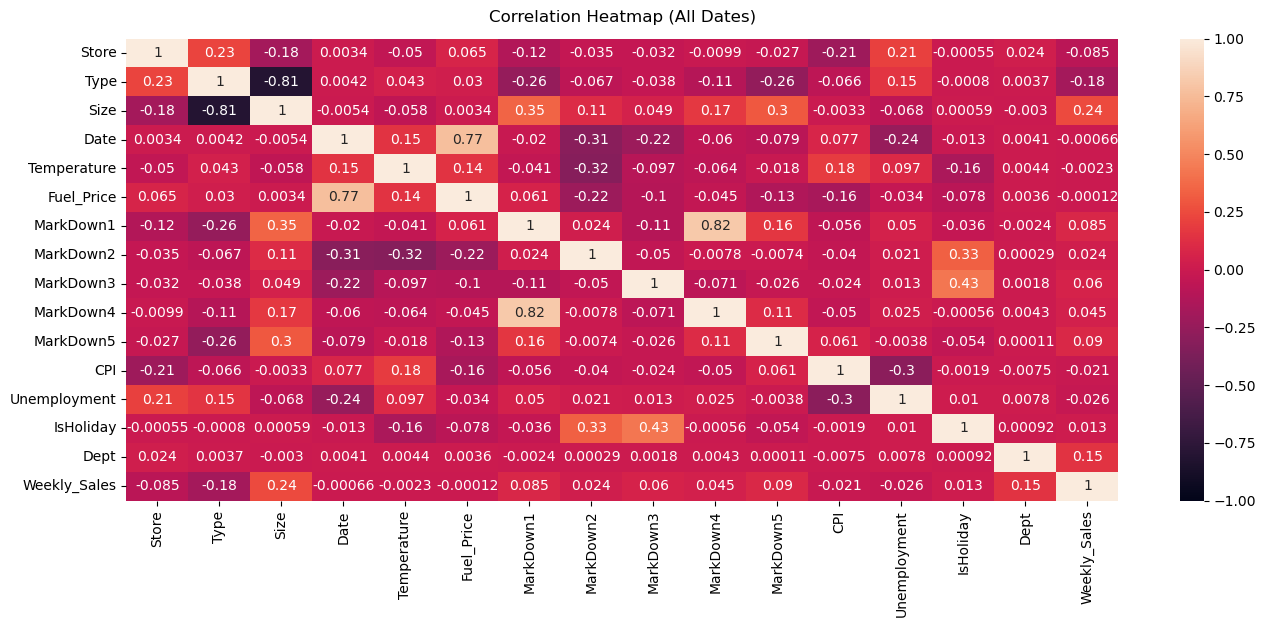

In [32]:
# From the analysis so far I can say that Markdowns on sales in general, helps stores to make sales with higher revenue.
# Note that our data has many features and features can affect eachother. My recommendation is to run a simple correlation func.
# This will help us see if we are missing anything.
# Lets try to run this code for every dataFrame we have.

# Correlation within data includes all dates available:

plt.figure(figsize=(16, 6))
CorrelationAllDates = sbn.heatmap(dfClean.corr(), vmin=-1, vmax=1, annot=True)
CorrelationAllDates.set_title('Correlation Heatmap (All Dates)', fontdict={'fontsize':12}, pad=12);

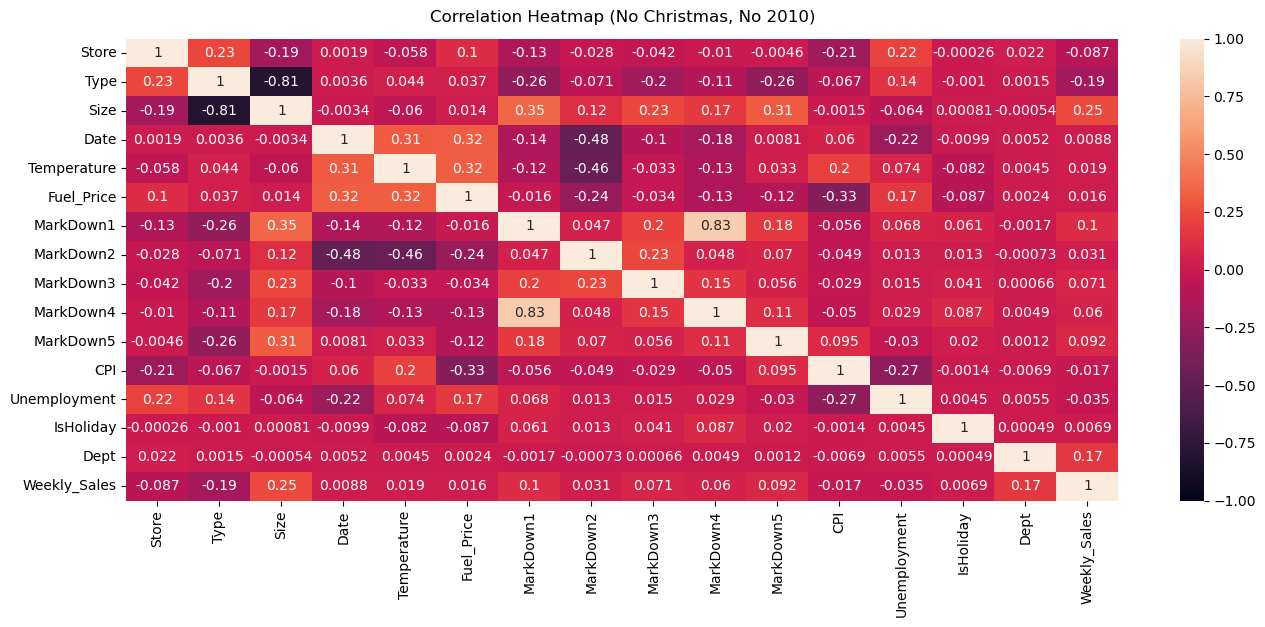

In [33]:
# Correlation within data excludes dates of christmas and 2010 dates all together:

plt.figure(figsize=(16, 6))
CorrelationAllDates = sbn.heatmap(dfDateFiltered.corr(), vmin=-1, vmax=1, annot=True)
CorrelationAllDates.set_title('Correlation Heatmap (No Christmas, No 2010)', fontdict={'fontsize':12}, pad=12);

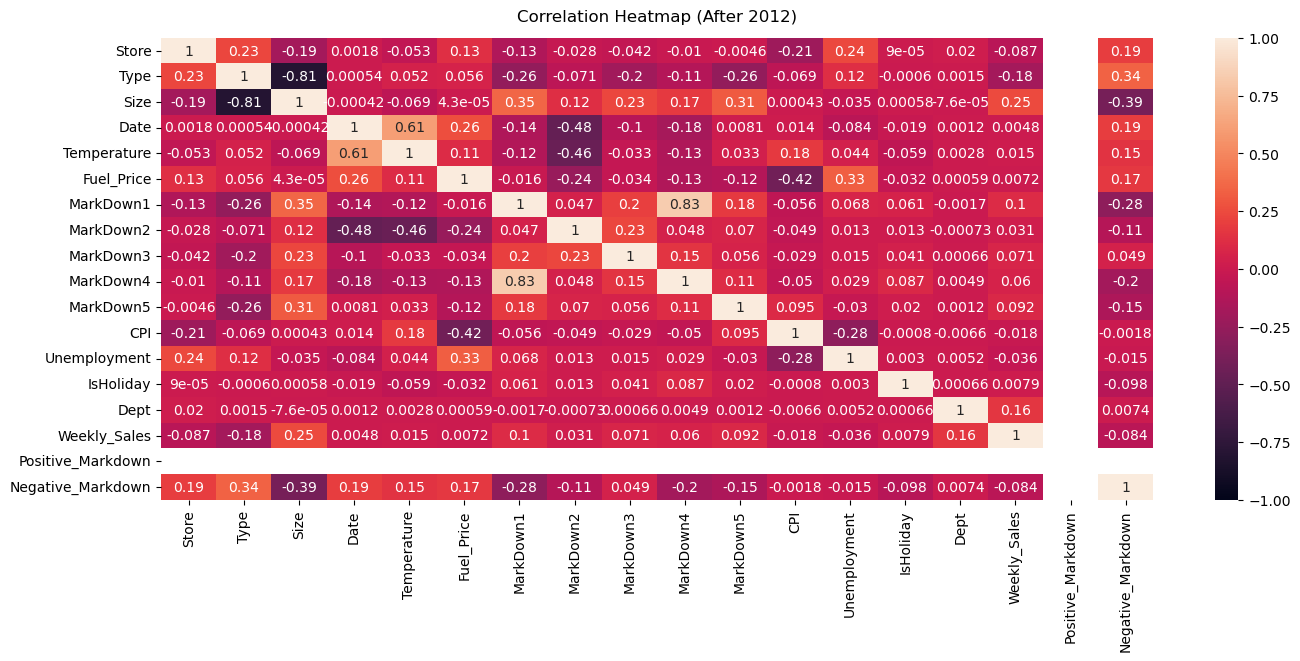

In [34]:
# Correlation within data only after 2012:

plt.figure(figsize=(16, 6))
CorrelationAllDates = sbn.heatmap(dfMarkdownAnalysisOverSample.corr(), vmin=-1, vmax=1, annot=True)
CorrelationAllDates.set_title('Correlation Heatmap (After 2012)', fontdict={'fontsize':12}, pad=12);

In [37]:
# I do not know the reason why my Positive_Markdown data is not availabe but they are boolean nonetheless so I will ignore it.
# Maybe because of too many features its almost impossible to make any healthy correlation with my experience.
# For now I will not move on to any model training but,
# I will focus on data visualization with Tableu or powerBI to at least have a solid trend analsis for weekly sales.